In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import numpy as np
import config_api
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf

In [2]:
user = config_api.tradingview_user
password = config_api.tradingview_password

In [3]:
tv = TvDatafeed(user, password, chromedriver_path= None)

In [4]:
data = tv.get_hist(symbol= 'BTCUSDT', exchange= 'BINANCE', interval= Interval.in_daily, n_bars= 5000)

In [111]:
df = data.copy()

In [112]:
df

,symbol,open,high,low,close,volume
datetime,,,,,,
2017-08-17 07:00:00,BINANCE:BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18 07:00:00,BINANCE:BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19 07:00:00,BINANCE:BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20 07:00:00,BINANCE:BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21 07:00:00,BINANCE:BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2022-01-31 07:00:00,BINANCE:BTCUSDT,37881.75,38744.00,36632.61,38466.90,36855.245800
2022-02-01 07:00:00,BINANCE:BTCUSDT,38466.90,39265.20,38000.00,38694.59,34574.446630
2022-02-02 07:00:00,BINANCE:BTCUSDT,38694.59,38855.92,36586.95,36896.36,35794.681300


In [113]:
df = df[['open', 'high', 'low', 'close', 'volume']]

In [114]:
#df[['open_chg', 'high_chg', 'low_chg','volume_chg']] = df[['open', 'high', 'low','volume']].pct_change().dropna()

In [115]:
df['5d_ret'] = df['close'].pct_change(5).shift(-5)

In [116]:
4108.37	 * (1+0.043012)

4285.07921044

In [117]:
ta_rsi = df.ta.rsi(length= 14, append= True)
ta_ma_obv = df.ta.ma_obv(fast= 5, slow= 35, ma_type= 'ema', append= True)
ta_ma_cross = df.ta.ma_cross(fast=5, slow=15, append= True)

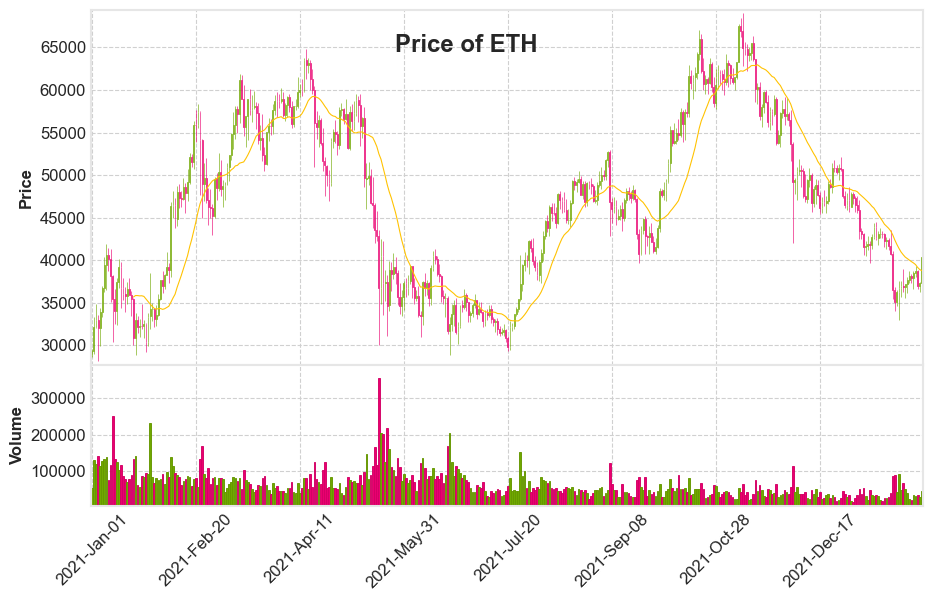

In [118]:
ticker = 'ETH'
mpf.plot(df.loc['2021':'2022'], figratio=(10, 6), type='candle', mav=(21), volume=True, title = f'Price of {ticker}', tight_layout=True, style='binance')

In [119]:
df

,open,high,low,close,volume,5d_ret,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff
datetime,,,,,,,,,,,,,,
2017-08-17 07:00:00,4261.48,4485.39,4200.74,4285.08,795.150377,-0.057194,NaN,7.951504e+02,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-18 07:00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,0.001373,NaN,-4.047379e+02,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-19 07:00:00,4108.37,4184.69,3850.00,4139.98,381.309763,0.042520,NaN,-2.342812e+01,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-20 07:00:00,4120.98,4211.08,4032.62,4086.29,467.083022,0.047571,NaN,-4.905111e+02,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-21 07:00:00,4069.13,4119.62,3911.79,4016.00,691.743060,0.080040,NaN,-1.182254e+03,-2.611562e+02,NaN,NaN,4127.144000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 07:00:00,37881.75,38744.00,36632.61,38466.90,36855.245800,NaN,40.279826,3.284449e+06,3.247904e+06,3.281556e+06,-33652.142494,37948.087296,38664.459417,-716.372121
2022-02-01 07:00:00,38466.90,39265.20,38000.00,38694.59,34574.446630,NaN,41.624131,3.319023e+06,3.271611e+06,3.283638e+06,-12027.276798,38196.921530,38668.225739,-471.304209
2022-02-02 07:00:00,38694.59,38855.92,36586.95,36896.36,35794.681300,NaN,34.935598,3.283229e+06,3.275483e+06,3.283615e+06,-8131.860299,37763.401020,38446.742522,-683.341502


In [120]:
def enc_rsi(rsi):
    if rsi > 50:
        return 1
    elif rsi < 50:
        return 0
    # try 66 and 33 / 30 and 70

In [121]:
def enc_maobv(maobv):
    if maobv > 0:
        return 1
    elif maobv < 0:
        return 0

In [122]:
def enc_ma_cross(ma_cross):
    if ma_cross > 0:
        return 1
    else:
        return 0

In [123]:
##### .pct_change before .apply 
# # example df['obv'].pct_change().apply(enc_obv_up)

##### try as binary encoding
#### obv increse from last tf?
def enc_obv_up(obv): 
    if obv > 0:
        return 1
    else:
        return 0

#### ma increse from last tf?
def enc_ma_up(ma):
    if ma > 0:
        return 1
    else:
        return 0

def enc_close_up(close):
    if close > 0:
        return 1
    else:
        return 0



##### dont need to .pct_change
def enc_high(high):
    if high > 0:
        return 1
    else:
        return 0

def enc_low(low):
    if low > 0:
        return 1
    else:
        return 0


In [124]:
# encode feature

In [125]:
df['strength'] = df[f'{ta_rsi.name}'].apply(enc_rsi)
df['vol_in'] = df[f'{ta_ma_obv.name}'].apply(enc_maobv)
df['ma_cross'] = df[f'{ta_ma_cross.name}'].apply(enc_ma_cross)

In [126]:
'''df['obv_up'] = df['OBV'].pct_change().apply(enc_obv_up)
df['ma_up'] = df['MAe_5'].pct_change().apply(enc_ma_up)
df['close_up'] = df['close'].pct_change().apply(enc_close_up)

df['high_up'] = df['high'].pct_change().apply(enc_high)
df['low_up'] = df['low'].pct_change().apply(enc_low)
'''

"df['obv_up'] = df['OBV'].pct_change().apply(enc_obv_up)\ndf['ma_up'] = df['MAe_5'].pct_change().apply(enc_ma_up)\ndf['close_up'] = df['close'].pct_change().apply(enc_close_up)\n\ndf['high_up'] = df['high'].pct_change().apply(enc_high)\ndf['low_up'] = df['low'].pct_change().apply(enc_low)\n"

In [127]:
df = pd.DataFrame(df)

In [128]:
# create  base signal

In [129]:
df['signal'] = (df['vol_in'] == 1) & (df['strength'] == 1) & (df['ma_cross'] == 1)

In [130]:
# in solution use True False signal

In [131]:
#df['signal'] = df['signal'] * 1

In [132]:
ret5d = df.pop('5d_ret')
df.insert(len(df.columns), '5d_ret', ret5d)

In [133]:
#df['5d_ret'] = df['5d_ret'] > 0

In [134]:
df.loc[(df['signal'] == True) & (df['5d_ret'] > 0), 'good_signal'] = 1
df.loc[(df['signal'] == True) & (df['5d_ret'] < 0), 'good_signal'] = -1
#df.loc[df['5d_ret'] < 0, 'good_signal'] = -1 # เอาเข้ามาเพื่อให้ model มันเขียนถึงวันที่จะขาดทุน

In [136]:
df

,open,high,low,close,volume,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,strength,vol_in,ma_cross,signal,5d_ret,good_signal
datetime,,,,,,,,,,,,,,,,,,,
2017-08-17 07:00:00,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,7.951504e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,-0.057194,NaN
2017-08-18 07:00:00,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,-4.047379e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0.001373,NaN
2017-08-19 07:00:00,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,-2.342812e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0.042520,NaN
2017-08-20 07:00:00,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,-4.905111e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,0.047571,NaN
2017-08-21 07:00:00,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,-1.182254e+03,-2.611562e+02,NaN,NaN,4127.144000,NaN,NaN,NaN,NaN,0,False,0.080040,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 07:00:00,37881.75,38744.00,36632.61,38466.90,36855.245800,40.279826,3.284449e+06,3.247904e+06,3.281556e+06,-33652.142494,37948.087296,38664.459417,-716.372121,0.0,0.0,0,False,NaN,NaN
2022-02-01 07:00:00,38466.90,39265.20,38000.00,38694.59,34574.446630,41.624131,3.319023e+06,3.271611e+06,3.283638e+06,-12027.276798,38196.921530,38668.225739,-471.304209,0.0,0.0,0,False,NaN,NaN
2022-02-02 07:00:00,38694.59,38855.92,36586.95,36896.36,35794.681300,34.935598,3.283229e+06,3.275483e+06,3.283615e+06,-8131.860299,37763.401020,38446.742522,-683.341502,0.0,0.0,0,False,NaN,NaN


In [137]:
df = df.dropna()

In [105]:
# scaling

In [106]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'RSI_14', 'OBV', 'OBVe_5',
       'OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15', 'MAe_5_15_diff',
       'strength', 'vol_in', 'ma_cross', 'signal', 'good_signal', '5d_ret'],
      dtype='object')

In [34]:
########### DL Zone #############

In [108]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

from sklearn.metrics import plot_confusion_matrix

#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [139]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'RSI_14', 'OBV', 'OBVe_5',
       'OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15', 'MAe_5_15_diff',
       'strength', 'vol_in', 'ma_cross', 'signal', '5d_ret', 'good_signal'],
      dtype='object')

In [162]:
# ไม่เอา 5d_ret เพราะมันเป็นแค่ ตัวประกอบในการ label good_signal
#df_dl = df[['RSI_14', 'OBV', 'OBVe_5','OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15', 'MAe_5_15_diff', 'strength', 'vol_in', 'ma_cross', 'good_signal']] * 1 #
df_dl = df[['RSI_14', 'OBV', 'OBVe_5','OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15', 'MAe_5_15_diff', 'good_signal']] * 1 #
#df_dl = df[['RSI_14', 'OBV', 'OBVe_5','OBVe_35', 'MAe_5', 'MAe_15', 'good_signal']] * 1 ### ลองไม่เอาส่วนต่าง
#df_dl = df[['RSI_14', 'MA_OBVe_5_35_diff', 'MAe_5', 'MAe_15', 'good_signal']] * 1

In [163]:
df_dl.columns

Index(['RSI_14', 'OBV', 'OBVe_5', 'OBVe_35', 'MA_OBVe_5_35_diff', 'MAe_5',
       'MAe_15', 'MAe_5_15_diff', 'good_signal'],
      dtype='object')

In [164]:
# strength start at 12:-1
# RSI 5:-1
X = df_dl.iloc[:-200, :-1]
y = df_dl.iloc[:-200,-1] #* 1

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 40)

In [166]:
#print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

### Investic Method

In [168]:
n_input = len(X.columns)
n_input

8

In [472]:
def dl_model(layer1, layer2, act, act_out, lr, loss, epochs, batch, dropout_rate):
    model = Sequential()
    model.add(Dense(layer1, activation= act, input_dim= n_input))
    #model.add(Dropout(dropout_rate))
    #model.add(Dense(layer2, activation= act))
    #model.add(Dense(layer2, activation= act_out))
    model.add(Dense(layer2, activation= act_out))
    model.add(Dense(1, activation= act_out))
    #model.add(Dense(1, activation= 'sigmoid'))

    opt = Adam(learning_rate= lr)
    model.compile(
        optimizer= opt,
        #loss= 'binary_crossentropy',
        loss= loss,
        metrics= 'acc'
    )

    history = model.fit(X_train, y_train, epochs=epochs, batch_size= batch, validation_split=0.2)# validation_data= (X_test,y_test))

    plot_loss(history)

    print(f'loss and acc: {model.evaluate(X_test,y_test)}')
    return history

def plot_loss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'], loc= 'upper left')
    plt.show()

    

Epoch 1/20
54/54 [==============================] - 0s 3ms/step - loss: 1.6938 - acc: 0.0031 - val_loss: 2.1505 - val_acc: 0.0000e+00
Epoch 2/20
54/54 [==============================] - 0s 831us/step - loss: 1.6940 - acc: 0.0031 - val_loss: 2.1506 - val_acc: 0.0000e+00
Epoch 3/20
54/54 [==============================] - 0s 942us/step - loss: 1.6935 - acc: 0.0031 - val_loss: 2.1508 - val_acc: 0.0000e+00
Epoch 4/20
54/54 [==============================] - 0s 886us/step - loss: 1.6932 - acc: 0.0031 - val_loss: 2.1507 - val_acc: 0.0000e+00
Epoch 5/20
54/54 [==============================] - 0s 794us/step - loss: 1.6932 - acc: 0.0031 - val_loss: 2.1509 - val_acc: 0.0000e+00
Epoch 6/20
54/54 [==============================] - 0s 869us/step - loss: 1.6928 - acc: 0.0031 - val_loss: 2.1508 - val_acc: 0.0000e+00
Epoch 7/20
54/54 [==============================] - 0s 923us/step - loss: 1.6928 - acc: 0.0031 - val_loss: 2.1508 - val_acc: 0.0000e+00
Epoch 8/20
54/54 [==============================] 

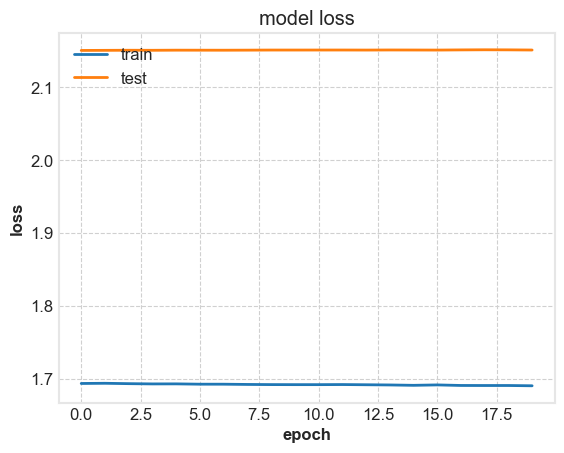

4/4 [==============================] - 0s 748us/step - loss: 3.3133 - acc: 0.0000e+00
loss and acc: [3.313253879547119, 0.0]


In [482]:
dl_model(16, 2, 'relu', 'tanh', lr= 0.001, loss= 'binary_crossentropy', epochs= 20, batch= 6, dropout_rate= 0)

In [43]:
'''model = Sequential()
model.add(Dense(50, activation= 'relu', input_dim= n_input))
model.add(Dense(1, activation= 'tanh'))
#model.add(Dense(1, activation= 'sigmoid'))

opt = Adam(learning_rate= 0.0001)
model.compile(
    optimizer= opt,
    #loss= 'binary_crossentropy',
    loss= 'MeanSquaredError',
    metrics= 'acc'
)
'''

In [44]:
'''history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)# validation_data= (X_test,y_test))'''

Epoch 1/10
62/62 [==============================] - 0s 3ms/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 2/10
62/62 [==============================] - 0s 741us/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 3/10
62/62 [==============================] - 0s 917us/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 4/10
62/62 [==============================] - 0s 724us/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 5/10
62/62 [==============================] - 0s 1ms/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 6/10
62/62 [==============================] - 0s 724us/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 7/10
62/62 [==============================] - 0s 869us/step - loss: 1.0291 - acc: 0.0437 - val_loss: 1.0581 - val_acc: 0.0452
Epoch 8/10
62/62 [==============================] - 0s 772us/step - loss: 1.0291

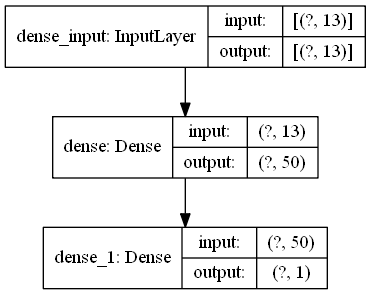

In [45]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.plot.png', show_shapes=True, show_layer_names=True)

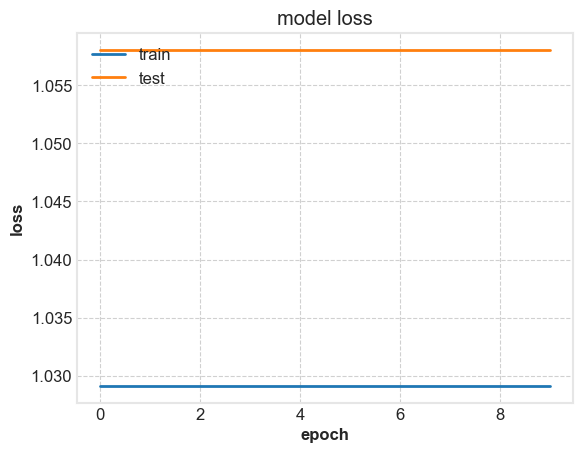

In [46]:
'''plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()'''

In [47]:
#model.evaluate(X_test,y_test) # performance

7/7 [==============================] - 0s 567us/step - loss: 1.1340 - acc: 0.0567


[1.1340205669403076, 0.05670103058218956]

In [381]:
#### if use sigmoid its like almost 0 or almost1
y_pred = model.predict(X_test)

In [90]:
compare = pd.DataFrame(y_test)
compare['y_pred'] = y_pred
compare['y_pred'] = (compare['y_pred'] > 0.5)

compare['correc_dir'] = (compare['y_pred'] == compare['5d_ret'])

correct_direction = (compare['correc_dir'].sum()) / len(compare['y_pred'])

print(f'Predict correct direction [%]: {correct_direction}')
### but wrong directhion than 1 layer ???? why

Predict correct direction [%]: 0.5857142857142857


In [91]:
# plot con... matrix

In [92]:
###### Backtest Zone ######

In [367]:
import vectorbt as vbt

In [368]:
df_live = df_dl.iloc[-200:]

In [369]:
df_live

,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,signal,5d_ret,good_signal
datetime,,,,,,,,,,,
2021-04-28 07:00:00,69.637533,5.666672e+07,5.534646e+07,5.324762e+07,2.098842e+06,2567.924083,2398.777455,169.146629,1,0.248450,1.0
2021-04-29 07:00:00,69.858036,5.753061e+07,5.607451e+07,5.348556e+07,2.588946e+06,2630.962722,2443.560273,187.402449,1,0.174814,1.0
2021-04-30 07:00:00,70.264490,5.822594e+07,5.679165e+07,5.374892e+07,3.042736e+06,2678.115148,2484.667739,193.447409,1,0.271185,1.0
2021-05-01 07:00:00,74.426219,5.891620e+07,5.749984e+07,5.403599e+07,3.463848e+06,2767.000099,2542.180522,224.819577,1,0.185060,1.0
2021-05-02 07:00:00,74.532900,5.948819e+07,5.816262e+07,5.433889e+07,3.823731e+06,2827.853399,2593.102956,234.750443,1,0.179678,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17 07:00:00,38.043922,6.117168e+07,6.117487e+07,6.195842e+07,-7.835548e+05,3277.204861,3371.784861,-94.580000,0,-0.248465,0.0
2022-01-18 07:00:00,36.648727,6.087255e+07,6.107409e+07,6.189810e+07,-8.240008e+05,3238.086574,3345.293003,-107.206429,0,-0.196478,0.0
2022-01-19 07:00:00,34.570569,6.053955e+07,6.089591e+07,6.182262e+07,-9.267065e+05,3186.731049,3312.633878,-125.902828,0,-0.209055,0.0


In [370]:
#X_live = df_live.iloc[:,13:-1]
X_live = df_live.iloc[:, :-1]
#y_live = df_live.iloc[:,-1]
y_live = df_live.iloc[:, -1]

In [371]:
y_pred_live = model.predict(X_live)

In [ ]:
plot_confusion_matrix(model, X_live, y_live)
plt.show()

In [373]:
model.evaluate(X_live,y_live)

7/7 [==============================] - 0s 570us/step - loss: 80895.2422 - acc: 0.7000


[80895.2421875, 0.699999988079071]

In [374]:
y_pred_live

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [375]:
### join y_pred_live to df_live for use as a signal
df_live['y_pred_live'] = y_pred_live

C:\Users\User\AppData\Local\Temp\ipykernel_2444\3514255008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_live['y_pred_live'] = y_pred_live


In [388]:
len(df_live.loc[(df_live['good_signal'] == 1) & (df_live['y_pred_live'] == 0)])

38

In [392]:
df_live = df_live.join(df['open'])

In [394]:
df_live['action_price'] = df_live.open.shift(-1)

In [396]:
df_signal = df_live.ta.tsignals(df_live['y_pred_live'], asbool= True, append= True)

In [397]:
df_signal.loc[df_signal['TS_Trades'] != 0]

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,
2021-05-16 07:00:00,False,-1,False,True
2021-07-28 07:00:00,True,1,True,False
2021-08-29 07:00:00,False,-1,False,True
2021-08-30 07:00:00,True,1,True,False
2021-09-07 07:00:00,False,-1,False,True


In [399]:
df_live_bt = df_live.loc[df_live['TS_Trades'] != 0]

In [402]:
df_live_bt

,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,signal,5d_ret,good_signal,y_pred_live,open,action_price,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,,,,,
2021-05-16 07:00:00,56.964198,5.833721e+07,5.972188e+07,5.758331e+07,2.138572e+06,3740.934346,3581.536848,159.397497,1,-0.321353,0.0,0.0,3646.24,3581.81,False,-1,False,True
2021-07-28 07:00:00,60.534389,5.620678e+07,5.461021e+07,5.225017e+07,2.360043e+06,2231.938153,2120.715117,111.223037,1,0.133004,1.0,1.0,2299.47,2300.90,True,1,True,False
2021-08-29 07:00:00,57.371313,6.331138e+07,6.353263e+07,6.097424e+07,2.558389e+06,3222.572794,3174.457522,48.115272,1,0.221699,1.0,0.0,3244.75,3223.47,False,-1,False,True
2021-08-30 07:00:00,57.591197,6.393673e+07,6.366733e+07,6.113882e+07,2.528507e+06,3224.928530,3181.355332,43.573198,1,0.203081,1.0,1.0,3223.47,3229.14,True,1,True,False
2021-09-07 07:00:00,51.640746,6.417628e+07,6.498509e+07,6.264514e+07,2.339946e+06,3716.656381,3569.673276,146.983105,1,-0.008840,0.0,0.0,3926.67,3434.84,False,-1,False,True


In [409]:
df_live.loc['2021-07']

,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,signal,5d_ret,good_signal,y_pred_live,open,action_price,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,,,,,
2021-07-03 07:00:00,49.589349,5.295563e+07,5.207711e+07,5.143718e+07,6.399276e+05,2161.583296,2144.364078,17.219219,0,-0.049690,0.0,0.0,2153.95,2226.99,False,0,False,False
2021-07-04 07:00:00,52.731076,5.354629e+07,5.256683e+07,5.155435e+07,1.012483e+06,2215.285531,2166.654818,48.630713,1,-0.075645,0.0,0.0,2226.99,2322.69,False,0,False,False
2021-07-05 07:00:00,48.444732,5.276448e+07,5.263272e+07,5.162158e+07,1.011137e+06,2209.033687,2170.389216,38.644472,0,-0.039080,0.0,0.0,2322.69,2196.85,False,0,False,False
2021-07-06 07:00:00,52.588841,5.354981e+07,5.293842e+07,5.172870e+07,1.209712e+06,2246.855791,2189.403064,57.452728,1,-0.078385,0.0,0.0,2196.85,2322.51,False,0,False,False
2021-07-07 07:00:00,52.375409,5.288331e+07,5.292005e+07,5.179285e+07,1.127199e+06,2270.093861,2205.298931,64.794930,1,-0.123022,0.0,0.0,2322.51,2316.25,False,0,False,False
2021-07-08 07:00:00,45.639640,5.200305e+07,5.261438e+07,5.180453e+07,8.098544e+05,2218.839241,2194.177814,24.661426,0,-0.083248,0.0,0.0,2316.25,2116.32,False,0,False,False
2021-07-09 07:00:00,46.768485,5.274166e+07,5.265681e+07,5.185659e+07,8.002174e+05,2194.889494,2188.279338,6.610156,0,-0.070988,0.0,0.0,2116.32,2146.99,False,0,False,False
2021-07-10 07:00:00,45.562130,5.224259e+07,5.251873e+07,5.187803e+07,6.406997e+05,2166.822996,2178.580670,-11.757675,0,-0.090577,0.0,0.0,2146.99,2110.68,False,0,False,False
2021-07-11 07:00:00,46.774275,5.258488e+07,5.254078e+07,5.191730e+07,6.234796e+05,2158.031997,2173.814337,-15.782339,0,-0.123427,0.0,0.0,2110.68,2140.54,False,0,False,False


In [403]:
#### iloc 1 จะทำเมื่อต่อเมื่อ มันเริ่มต้นที่ trade -1 เลยต้องทำให้เริ่มที่ซื้อ
df_live_bt = df_live_bt.iloc[1:]# -6:]

In [404]:
df_live_bt.loc[(df_live_bt['signal'] == 1) & (df_live_bt['y_pred_live'] != 1)]

,RSI_14,OBV,OBVe_5,OBVe_35,MA_OBVe_5_35_diff,MAe_5,MAe_15,MAe_5_15_diff,signal,5d_ret,good_signal,y_pred_live,open,action_price,TS_Trends,TS_Trades,TS_Entries,TS_Exits
datetime,,,,,,,,,,,,,,,,,,
2021-08-29 07:00:00,57.371313,6.331138e+07,6.353263e+07,6.097424e+07,2.558389e+06,3222.572794,3174.457522,48.115272,1,0.221699,1.0,0.0,3244.75,3223.47,False,-1,False,True
2021-09-07 07:00:00,51.640746,6.417628e+07,6.498509e+07,6.264514e+07,2.339946e+06,3716.656381,3569.673276,146.983105,1,-0.008840,0.0,0.0,3926.67,3434.84,False,-1,False,True


In [405]:
port = vbt.Portfolio.from_signals(
    df_live_bt['action_price'],
    entries= df_live_bt.TS_Entries,
    exits= df_live_bt.TS_Exits,
    freq= '1D',
    init_cash= 100,
    fees= 0.0025,
    slippage= 0.0050
)

In [406]:
port.stats()

Start                         2021-07-28 07:00:00
End                           2021-09-07 07:00:00
Period                            4 days 00:00:00
Start Value                                 100.0
End Value                              144.616088
Total Return [%]                        44.616088
Benchmark Return [%]                    49.282455
Max Gross Exposure [%]                      100.0
Total Fees Paid                          1.301879
Max Drawdown [%]                         0.745648
Max Drawdown Duration             1 days 00:00:00
Total Trades                                    2
Total Closed Trades                             2
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                100.0
Best Trade [%]                          38.105304
Worst Trade [%]                          4.798429
Avg Winning Trade [%]                   21.451866
Avg Losing Trade [%]                          NaN


In [ ]:
port.